## DBSCAN clustering

- Density-Based Spatial Clustering of Applications with Noise
- Agrupa pontos similares no mesmo espaço
- Não é necessário especificar o número de clusters
- Em geral, apresenta melhores resultados do que o Kmeans
- Mais rápido do que o Kmeans
- Tenta encontrar pontos separados por uma distância não maior do que um limiar (threshold distance)

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import DBSCAN

In [2]:
# Load
base = pd.read_csv('../../data/credit_card_clients.csv', header=1)
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
base['BILL_TOTAL'] = 0
for i in range(1, 7):
    base['BILL_TOTAL'] += base['BILL_AMT' + str(i)]
    
X = base.iloc[:, [1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
dbscan = DBSCAN(eps = 0.37, metric = 'euclidean', min_samples = 4)
dbscan.fit(X)
previsoes = dbscan.labels_

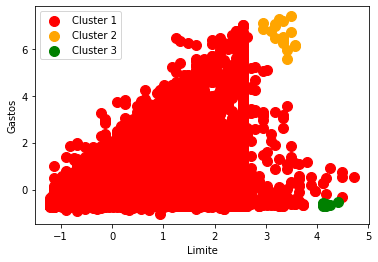

In [10]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()